<a href="https://colab.research.google.com/github/sathishrouthu/DEEP-LEARNING/blob/main/backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,0]],columns=['x0','x1','y'])

In [3]:
df

,x0,x1,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
class NeuralNetwork:
  def __init__(self,layers,alpha=0.1):
    self.W=[]
    self.layers = layers
    self.alpha = alpha
    self.losses = {}
    for i in np.arange(0,len(layers)-2):
      w = np.random.randn(layers[i]+1,layers[i+1]+1)
      self.W.append(w/np.sqrt(layers[i]))
    w = np.random.randn(layers[-2]+1,layers[-1])
    self.W.append(w/np.sqrt(layers[-2]))
  def __repr__(self):
    return "NeuralNetWork : "+"-".join([str(i) for i in self.layers])

  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))

  def sigmoid_deriv(self,x):
    return x*(1-x)

  def fit(self,X,y,epochs=1000,displayUpdate=100):
    X = np.c_[X,np.ones((X.shape[0]))]
    for epoch in np.arange(0,epochs):
      for x,target in zip(X,y):
        self.fit_partial(x,target)
      if epoch==0 or (epoch+1)%displayUpdate ==0:
        loss = self.calculate_loss(X,y)
        self.losses[epoch+1] = loss
        print("[INFO] epoch={}, loss={:.6f}".format(epoch + 1, loss))

  def fit_partial(self,x,y):
    A = [np.atleast_2d(x)]
    for layer in np.arange(0,len(self.W)):
      net = A[layer].dot(self.W[layer])
      out = self.sigmoid(net)
      A.append(out)
    error = A[-1]-y
    D =[error* self.sigmoid_deriv(A[-1])]
    for layer in np.arange(len(A)-2,0,-1):
      delta = D[-1].dot(self.W[layer].T)
      delta = delta * self.sigmoid_deriv(A[layer])
      D.append(delta)
    D = D[::-1]
    for layer in range(0,len(self.W)):
      self.W[layer]+= -self.alpha*A[layer].T.dot(D[layer])
  def predict(self,X,addBias=True):
    p = np.atleast_2d(X)
    if addBias:
      p = np.c_[p, np.ones((p.shape[0]))]

    for layer in np.arange(0, len(self.W)):
      p = self.sigmoid(np.dot(p, self.W[layer]))
    return p
  def calculate_loss(self,X,targets):
    targets = np.atleast_2d(targets)
    predictions = self.predict(X, addBias=False)
    loss = 0.5 * np.sum((predictions - targets) ** 2)
    return loss


In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [32]:
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=10000)

[INFO] epoch=1, loss=0.514085
[INFO] epoch=100, loss=0.499520
[INFO] epoch=200, loss=0.493619
[INFO] epoch=300, loss=0.476422
[INFO] epoch=400, loss=0.426663
[INFO] epoch=500, loss=0.342946
[INFO] epoch=600, loss=0.245499
[INFO] epoch=700, loss=0.116808
[INFO] epoch=800, loss=0.055230
[INFO] epoch=900, loss=0.034048
[INFO] epoch=1000, loss=0.023941
[INFO] epoch=1100, loss=0.018188
[INFO] epoch=1200, loss=0.014536
[INFO] epoch=1300, loss=0.012036
[INFO] epoch=1400, loss=0.010231
[INFO] epoch=1500, loss=0.008872
[INFO] epoch=1600, loss=0.007815
[INFO] epoch=1700, loss=0.006972
[INFO] epoch=1800, loss=0.006286
[INFO] epoch=1900, loss=0.005716
[INFO] epoch=2000, loss=0.005237
[INFO] epoch=2100, loss=0.004829
[INFO] epoch=2200, loss=0.004477
[INFO] epoch=2300, loss=0.004171
[INFO] epoch=2400, loss=0.003902
[INFO] epoch=2500, loss=0.003665
[INFO] epoch=2600, loss=0.003454
[INFO] epoch=2700, loss=0.003264
[INFO] epoch=2800, loss=0.003094
[INFO] epoch=2900, loss=0.002940
[INFO] epoch=3000, los

Text(0, 0.5, 'Loss')

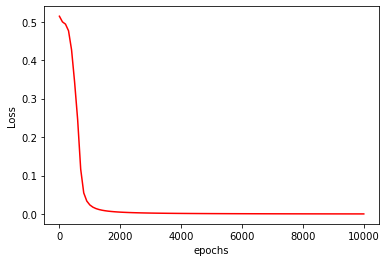

In [33]:
plt.plot(list(nn.losses.keys()),list(nn.losses.values()),'r-')

plt.xlabel("epochs")
plt.ylabel("Loss")

In [34]:
for (x, target) in zip(X, y):
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(x, target[0], pred, step))

[INFO] data=[0 0], ground-truth=0, pred=0.0148, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9843, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9792, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0178, step=0


# MNIST Data set

In [51]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [53]:
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0], data.shape[1]))

[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64


In [54]:
(trainX, testX, trainY, testY) = train_test_split(data,digits.target, test_size=0.25)
# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [55]:
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

[INFO] training network...
[INFO] NeuralNetWork : 64-32-16-10
[INFO] epoch=1, loss=606.241349
[INFO] epoch=100, loss=7.234899
[INFO] epoch=200, loss=2.230643
[INFO] epoch=300, loss=1.581630
[INFO] epoch=400, loss=1.375118
[INFO] epoch=500, loss=1.273823
[INFO] epoch=600, loss=1.214076
[INFO] epoch=700, loss=1.174706
[INFO] epoch=800, loss=1.145427
[INFO] epoch=900, loss=0.188427
[INFO] epoch=1000, loss=0.136655


In [56]:
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.94      1.00      0.97        33
           2       0.96      1.00      0.98        53
           3       1.00      0.96      0.98        54
           4       0.97      1.00      0.99        38
           5       0.98      0.96      0.97        55
           6       1.00      0.98      0.99        47
           7       1.00      1.00      1.00        46
           8       1.00      0.95      0.98        42
           9       0.95      0.97      0.96        36

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(0, 0.5, 'Loss')

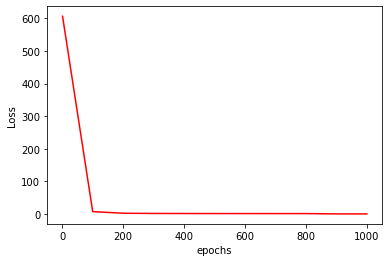

In [57]:
plt.plot(list(nn.losses.keys()),list(nn.losses.values()),'r-')
plt.xlabel("epochs")
plt.ylabel("Loss")